In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()



In [4]:
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Knn

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [9]:
print(df.shape)

(569, 31)


In [10]:
x=df[df.columns[:-1]]
y=df["target"]
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


In [14]:
x_train.value_counts()
y_train.value_counts()


target
1.0    285
0.0    170
Name: count, dtype: int64

In [15]:
x_test.value_counts()
y_test.value_counts()

target
1.0    72
0.0    42
Name: count, dtype: int64

# Model Tranning

In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred
 

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

model Evaluation 

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)





Accuracy:  0.9298245614035088


In [36]:
knn = KNeighborsClassifier(n_neighbors=10, algorithm='brute')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy4: ", accuracy4)

knn = KNeighborsClassifier(n_neighbors=18, algorithm='kd_tree')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy5: ", accuracy5)

knn = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

accuracy6 = accuracy_score(y_test, y_pred)
print("Accuracy6: ", accuracy6)

knn = KNeighborsClassifier(n_neighbors=6, algorithm='auto')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

accuracy7 = accuracy_score(y_test, y_pred)
print("Accuracy7: ", accuracy7)

knn = KNeighborsClassifier(n_neighbors=8, algorithm='auto')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

accuracy8 = accuracy_score(y_test, y_pred)
print("Accuracy8: ", accuracy8)


Accuracy4:  0.9385964912280702
Accuracy5:  0.9473684210526315
Accuracy6:  0.9385964912280702
Accuracy7:  0.9298245614035088
Accuracy8:  0.9385964912280702


In [37]:
from sklearn.tree import DecisionTreeClassifier


In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
y_pred

accuracy9 = accuracy_score(y_test, y_pred)
print("Accuracy9: ", accuracy9)




Accuracy9:  0.9649122807017544


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rdforest = RandomForestClassifier()
rdforest.fit(x_train, y_train)

y_pred = rdforest.predict(x_test)
y_pred

accuracy10 = accuracy_score(y_test, y_pred)
print("Accuracy10: ", accuracy10)

Accuracy10:  0.9649122807017544


In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [44]:
fscore = f1_score(y_test, y_pred)
print("F1 Score: ", fscore)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)


F1 Score:  0.971830985915493
Precision:  0.9857142857142858
Recall:  0.9583333333333334


In [45]:
print(dtree.feature_importances_)


[0.00880418 0.03339067 0.         0.00845201 0.         0.
 0.02935689 0.         0.         0.         0.00691528 0.
 0.         0.00299583 0.01011572 0.         0.         0.
 0.         0.0075129  0.         0.03870067 0.         0.69458086
 0.         0.         0.01126935 0.13883012 0.00907551 0.        ]


In [46]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


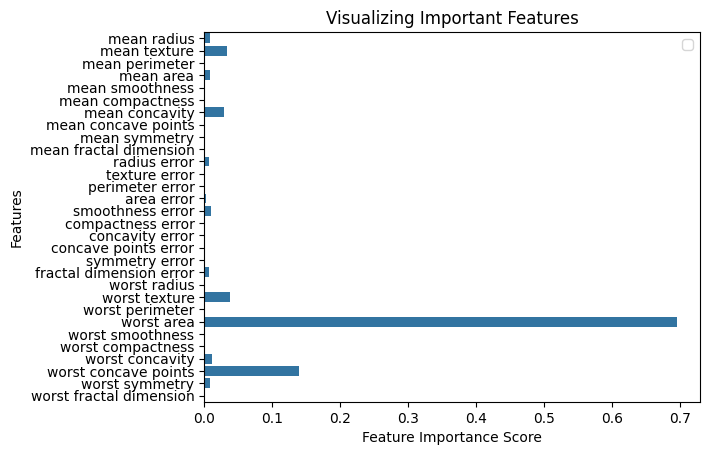

In [48]:
feature_imp = pd.Series(dtree.feature_importances_, index=x.columns)
feature_imp

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")

plt.ylabel("Features")

plt.title("Visualizing Important Features")

plt.legend()

plt.show()
